Leitura do arquivo TSP:

In [1]:
# Função para ler e imprimir as informações do arquivo TSP
def ler_arquivo_tsp(nome_arquivo):
    with open(nome_arquivo, 'r') as arquivo:
        for linha in arquivo:
            print(linha.strip())

# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Chamando a função para ler e imprimir as informações
ler_arquivo_tsp(nome_arquivo)

NAME : xqf131
COMMENT : Bonn VLSI data set with 131 points
COMMENT : Uni Bonn, Research Institute for Discrete Math
COMMENT : Contributed by Andre Rohe
TYPE : TSP
DIMENSION : 131
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 0 13
2 0 26
3 0 27
4 0 39
5 2 0
6 5 13
7 5 19
8 5 25
9 5 31
10 5 37
11 5 43
12 5 8
13 8 0
14 9 10
15 10 10
16 11 10
17 12 10
18 12 5
19 15 13
20 15 19
21 15 25
22 15 31
23 15 37
24 15 43
25 15 8
26 18 11
27 18 13
28 18 15
29 18 17
30 18 19
31 18 21
32 18 23
33 18 25
34 18 27
35 18 29
36 18 31
37 18 33
38 18 35
39 18 37
40 18 39
41 18 41
42 18 42
43 18 44
44 18 45
45 25 11
46 25 15
47 25 22
48 25 23
49 25 24
50 25 26
51 25 28
52 25 29
53 25 9
54 28 16
55 28 20
56 28 28
57 28 30
58 28 34
59 28 40
60 28 43
61 28 47
62 32 26
63 32 31
64 33 15
65 33 26
66 33 29
67 33 31
68 34 15
69 34 26
70 34 29
71 34 31
72 34 38
73 34 41
74 34 5
75 35 17
76 35 31
77 38 16
78 38 20
79 38 30
80 38 34
81 40 22
82 41 23
83 41 32
84 41 34
85 41 35
86 41 36
87 48 22
88 48 27
89 48 6
90 51 

Plotar o gráfico:

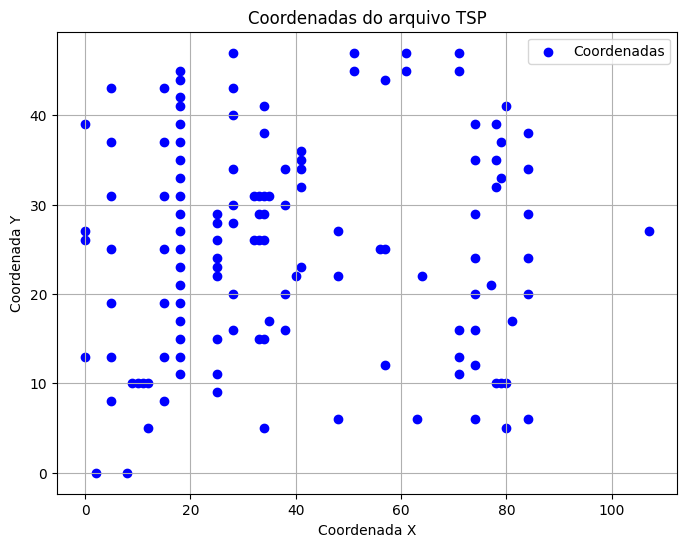

In [2]:
import matplotlib.pyplot as plt

# Função para ler as coordenadas do arquivo TSP
def ler_coordenadas_tsp(nome_arquivo):
    coordenadas = []
    with open(nome_arquivo, 'r') as arquivo:
        leitura_iniciada = False
        for linha in arquivo:
            if "NODE_COORD_SECTION" in linha:
                leitura_iniciada = True
                continue
            elif "EOF" in linha:
                break
            if leitura_iniciada:
                partes = linha.strip().split()
                if len(partes) == 3:
                    _, x, y = partes
                    coordenadas.append((float(x), float(y)))
    return coordenadas

nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

# Extrair as coordenadas x e y
x = [coord[0] for coord in coordenadas]
y = [coord[1] for coord in coordenadas]

# Plotar as coordenadas
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='b', marker='o', label='Coordenadas')
plt.title('Coordenadas do arquivo TSP')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()


Atribuir coordenadas a cidades individuos:

In [3]:
# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

# Criar um dicionário que associa cada número a uma coordenada
cidades = {i+1: coord for i, coord in enumerate(coordenadas)}

# Imprimir o dicionário na tela
print(cidades)


{1: (0.0, 13.0), 2: (0.0, 26.0), 3: (0.0, 27.0), 4: (0.0, 39.0), 5: (2.0, 0.0), 6: (5.0, 13.0), 7: (5.0, 19.0), 8: (5.0, 25.0), 9: (5.0, 31.0), 10: (5.0, 37.0), 11: (5.0, 43.0), 12: (5.0, 8.0), 13: (8.0, 0.0), 14: (9.0, 10.0), 15: (10.0, 10.0), 16: (11.0, 10.0), 17: (12.0, 10.0), 18: (12.0, 5.0), 19: (15.0, 13.0), 20: (15.0, 19.0), 21: (15.0, 25.0), 22: (15.0, 31.0), 23: (15.0, 37.0), 24: (15.0, 43.0), 25: (15.0, 8.0), 26: (18.0, 11.0), 27: (18.0, 13.0), 28: (18.0, 15.0), 29: (18.0, 17.0), 30: (18.0, 19.0), 31: (18.0, 21.0), 32: (18.0, 23.0), 33: (18.0, 25.0), 34: (18.0, 27.0), 35: (18.0, 29.0), 36: (18.0, 31.0), 37: (18.0, 33.0), 38: (18.0, 35.0), 39: (18.0, 37.0), 40: (18.0, 39.0), 41: (18.0, 41.0), 42: (18.0, 42.0), 43: (18.0, 44.0), 44: (18.0, 45.0), 45: (25.0, 11.0), 46: (25.0, 15.0), 47: (25.0, 22.0), 48: (25.0, 23.0), 49: (25.0, 24.0), 50: (25.0, 26.0), 51: (25.0, 28.0), 52: (25.0, 29.0), 53: (25.0, 9.0), 54: (28.0, 16.0), 55: (28.0, 20.0), 56: (28.0, 28.0), 57: (28.0, 30.0), 58

Criar população de 10 individuos:

In [4]:
import random

# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

# Função para criar um indivíduo aleatório
def criar_individuo(coordenadas):
    return random.sample(coordenadas, len(coordenadas))

# Função para criar uma população de indivíduos
def criar_populacao(coordenadas, tamanho_populacao):
    return [criar_individuo(coordenadas) for _ in range(tamanho_populacao)]

# Criar uma população de 10 indivíduos
populacao = criar_populacao(coordenadas, 10)

# Imprimir a população na tela
print(populacao)


[[(25.0, 9.0), (28.0, 40.0), (34.0, 29.0), (34.0, 31.0), (18.0, 35.0), (84.0, 24.0), (9.0, 10.0), (41.0, 36.0), (0.0, 26.0), (0.0, 13.0), (64.0, 22.0), (10.0, 10.0), (33.0, 29.0), (28.0, 30.0), (18.0, 42.0), (25.0, 23.0), (15.0, 13.0), (79.0, 33.0), (84.0, 6.0), (33.0, 31.0), (61.0, 47.0), (71.0, 11.0), (25.0, 29.0), (74.0, 24.0), (77.0, 21.0), (18.0, 39.0), (57.0, 12.0), (71.0, 47.0), (0.0, 27.0), (84.0, 38.0), (74.0, 6.0), (5.0, 37.0), (51.0, 45.0), (78.0, 32.0), (12.0, 5.0), (18.0, 17.0), (18.0, 44.0), (56.0, 25.0), (34.0, 41.0), (38.0, 34.0), (18.0, 33.0), (18.0, 37.0), (33.0, 26.0), (71.0, 13.0), (79.0, 37.0), (18.0, 31.0), (38.0, 16.0), (28.0, 34.0), (15.0, 43.0), (5.0, 19.0), (40.0, 22.0), (34.0, 26.0), (18.0, 25.0), (28.0, 16.0), (18.0, 11.0), (32.0, 26.0), (41.0, 35.0), (79.0, 10.0), (5.0, 43.0), (11.0, 10.0), (41.0, 23.0), (8.0, 0.0), (18.0, 27.0), (74.0, 12.0), (18.0, 41.0), (2.0, 0.0), (34.0, 38.0), (18.0, 45.0), (28.0, 28.0), (18.0, 19.0), (5.0, 8.0), (74.0, 20.0), (12.0, 

Calcular fitness:

[4588.506985242346, 4254.474298852438, 4556.267952357425, 4869.474631494787, 4529.015982895586, 4759.9104913186675, 4309.585545685194, 4476.306966201698, 5093.994393868062, 4683.519681843642]


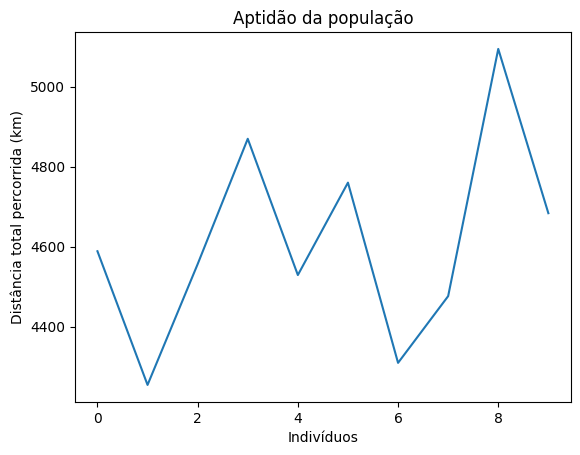

In [5]:
def distancia_entre_cidades(cidade1, cidade2):
    x1, y1 = cidade1
    x2, y2 = cidade2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def aptidao(individuo):
    distancia_total = 0
    for i in range(len(individuo)):
        cidade_atual = individuo[i]
        proxima_cidade = individuo[(i + 1) % len(individuo)]
        distancia_total += distancia_entre_cidades(cidade_atual, proxima_cidade)
    return distancia_total

aptidoes = []
for individuo in populacao:
    aptidoes.append(aptidao(individuo))

print(aptidoes)

import matplotlib.pyplot as plt

plt.plot(aptidoes)
plt.title('Aptidão da população')
plt.xlabel('Indivíduos')
plt.ylabel('Distância total percorrida (km)')
plt.show()

Utilizar o método de Torneio para a seleção:

In [12]:
# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

def selecao(populacao, tamanho_torneio):
    # Seleciona aleatoriamente um subconjunto da população (tamanho do torneio)
    torneio = random.sample(populacao, tamanho_torneio)
    
    # Retorna o indivíduo com a melhor aptidão do torneio
    return min(torneio, key=aptidao)

# Número de populações e tamanho de cada população
numero_populacoes = 200
tamanho_populacao = 200

# Inicializar a melhor distância com um valor alto
melhor_distancia_global = float('inf')
melhor_rota_global = None

# Realizar a otimização em várias populações
for populacao_numero in range(numero_populacoes):
    # Criar uma nova população
    populacao = criar_populacao(coordenadas, tamanho_populacao)

    # Inicializar uma lista para armazenar as aptidões dos indivíduos
    aptidoes = []

    # Calcular a aptidão de cada indivíduo na população
    for individuo in populacao:
        aptidoes.append(aptidao(individuo))

    # Encontrar o melhor resultado da população
    melhor_individuo = populacao[aptidoes.index(min(aptidoes))]
    melhor_distancia = min(aptidoes)

    # Atualizar o melhor resultado global, se necessário
    if melhor_distancia < melhor_distancia_global:
        melhor_distancia_global = melhor_distancia
        melhor_rota_global = melhor_individuo

    print(f"População {populacao_numero + 1}: Melhor distância = {melhor_distancia:.2f} km")

# Mapear as cidades em números
cidades = {i: cidade for i, cidade in enumerate(coordenadas)}

# No final de todas as populações, você terá o melhor resultado global
print("Melhor resultado global:")
melhor_rota_numeros = [list(cidades.keys())[list(cidades.values()).index(cidade)] for cidade in melhor_rota_global]
print(f"Melhor rota: {melhor_rota_numeros}")
print(f"Melhor distância: {melhor_distancia_global:.2f} km")

População 1: Melhor distância = 4192.27 km


População 2: Melhor distância = 4135.27 km
População 3: Melhor distância = 3869.13 km
População 4: Melhor distância = 4098.08 km
População 5: Melhor distância = 4089.45 km
População 6: Melhor distância = 4164.32 km
População 7: Melhor distância = 4227.45 km
População 8: Melhor distância = 4039.80 km
População 9: Melhor distância = 4134.82 km
População 10: Melhor distância = 4098.29 km
População 11: Melhor distância = 4106.15 km
População 12: Melhor distância = 4088.81 km
População 13: Melhor distância = 4073.65 km
População 14: Melhor distância = 3990.55 km
População 15: Melhor distância = 4071.32 km
População 16: Melhor distância = 4172.45 km
População 17: Melhor distância = 4040.50 km
População 18: Melhor distância = 4173.06 km
População 19: Melhor distância = 4177.18 km
População 20: Melhor distância = 4085.58 km
População 21: Melhor distância = 4137.05 km
População 22: Melhor distância = 4168.21 km
População 23: Melhor distância = 3957.54 km
População 24: Melhor distância = 4112.70

Cruzamento & Mutação:

In [17]:
# Função para realizar o cruzamento (crossover)
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 1)
    pai1_list = list(pai1)
    pai2_list = list(pai2)
    filho1 = pai1_list[:ponto_corte] + [gene for gene in pai2_list if gene not in pai1_list[:ponto_corte]]
    filho2 = pai2_list[:ponto_corte] + [gene for gene in pai1_list if gene not in pai2_list[:ponto_corte]]
    return tuple(filho1), tuple(filho2)

# Função para realizar a mutação
def mutacao(individuo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        individuo_list = list(individuo)
        if len(individuo_list) >= 2:
            idx1, idx2 = random.sample(range(len(individuo_list), 2))
            individuo_list[idx1], individuo_list[idx2] = individuo_list[idx2], individuo_list[idx1]
        individuo = tuple(individuo_list)

# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

# Número de populações e tamanho de cada população
numero_populacoes = 500
tamanho_populacao = 500
taxa_mutacao = 0.7

# Inicializar a melhor distância com um valor alto
melhor_distancia_global = float('inf')
melhor_rota_global = None
geracoes_sem_melhora = 0

# Realizar a otimização em várias populações
populacao_anterior = None  # População anterior
melhores_distancias = []

for populacao_numero in range(numero_populacoes):
    # Criar uma nova população
    populacao = criar_populacao(coordenadas, tamanho_populacao)

    aptidoes = []

    for individuo in populacao:
        aptidoes.append(aptidao(individuo))

    melhor_individuo = populacao[aptidoes.index(min(aptidoes))]
    melhor_distancia = min(aptidoes)

    if melhor_distancia < melhor_distancia_global:
        melhor_distancia_global = melhor_distancia
        melhor_rota_global = melhor_individuo
        geracoes_sem_melhora = 0
    else:
        geracoes_sem_melhora += 1

    print(f"População {populacao_numero + 1}: Melhor distância = {int(melhor_distancia)} km")

    if geracoes_sem_melhora >= 10:
        break

    nova_populacao = []

    while len(nova_populacao) < tamanho_populacao:
        pais = selecao(populacao, 3)
        filho1, filho2 = crossover(pais[0], pais[1])
        mutacao(filho1, taxa_mutacao)
        mutacao(filho2, taxa_mutacao)
        nova_populacao.extend([filho1, filho2])

    populacao = nova_populacao

    if populacao_anterior is not None and aptidao(melhor_individuo) >= aptidao(populacao_anterior[0]):
        break

    populacao_anterior = populacao

    melhores_distancias.append(int(melhor_distancia))

cidades = {i: cidade for i, cidade in enumerate(coordenadas)}

print("Melhor resultado global:")
melhor_rota_numeros = [list(cidades.keys())[list(cidades.values()).index(cidade)] for cidade in melhor_rota_global]
print(f"Melhor rota: {melhor_rota_numeros}")
print(f"Melhor distância: {int(melhor_distancia_global)} km")

plt.figure(figsize=(8, 6))
plt.plot(melhores_distancias)
plt.title('Melhores Distâncias em Cada Geração')
plt.xlabel('Geração')
plt.ylabel('Melhor Distância (km)')
plt.grid(True)
plt.show()

População 1: Melhor distância = 4054.93 km
População 2: Melhor distância = 4069.27 km


TypeError: cannot unpack non-iterable float object

Novo gráfico:

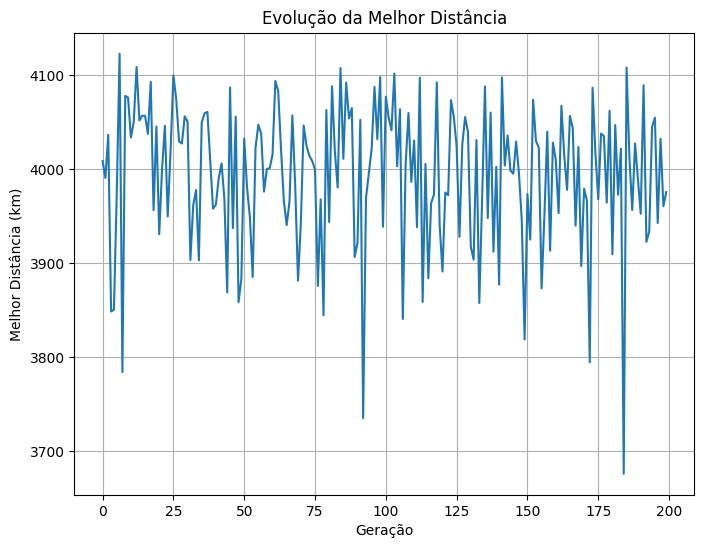

Melhor resultado global:
Melhor rota: [46, 22, 1, 50, 97, 41, 127, 130, 128, 116, 70, 67, 58, 38, 3, 80, 105, 107, 43, 13, 56, 47, 49, 71, 110, 96, 30, 35, 88, 98, 112, 19, 12, 52, 42, 36, 32, 6, 44, 26, 61, 69, 73, 129, 74, 85, 65, 2, 31, 104, 106, 99, 66, 75, 16, 54, 5, 14, 8, 29, 25, 40, 55, 27, 34, 45, 86, 120, 94, 125, 37, 95, 77, 79, 122, 78, 20, 115, 4, 119, 118, 117, 108, 18, 28, 62, 59, 101, 103, 102, 100, 113, 24, 15, 17, 87, 83, 51, 23, 114, 93, 64, 7, 63, 53, 57, 11, 89, 39, 84, 72, 90, 121, 76, 123, 68, 126, 124, 92, 60, 48, 111, 109, 81, 33, 10, 9, 82, 91, 0, 21]
Melhor distância: 3676.11 km


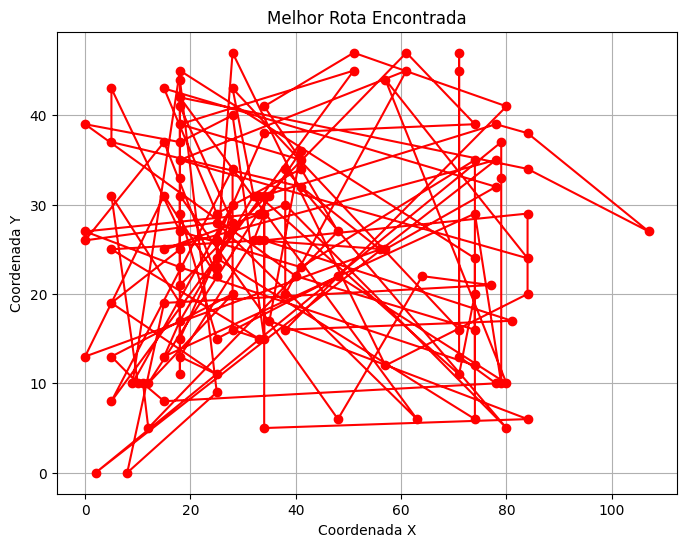

In [25]:
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 1)
    pai1_list = list(pai1)
    pai2_list = list(pai2)
    filho1 = pai1_list[:ponto_corte] + [gene for gene in pai2_list if gene not in pai1_list[:ponto_corte]]
    filho2 = pai2_list[:ponto_corte] + [gene for gene in pai1_list if gene not in pai2_list[:ponto_corte]]
    return tuple(filho1), tuple(filho2)

def mutacao(individuo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        individuo_list = list(individuo)
        if len(individuo_list) >= 2:
            idx1, idx2 = random.sample(range(len(individuo_list)), 2)
            individuo_list[idx1], individuo_list[idx2] = individuo_list[idx2], individuo_list[idx1]
        individuo = tuple(individuo_list)

# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

# Número de populações e tamanho de cada população
numero_populacoes = 200
tamanho_populacao = 1000
taxa_mutacao = 0.7

# Inicializar a melhor distância com um valor alto
melhor_distancia_global = float('inf')
melhor_rota_global = None

# Inicialize uma lista para armazenar as melhores distâncias em cada geração
melhores_distancias = []

# Realizar a otimização em várias populações
populacao_anterior = None  # População anterior
for populacao_numero in range(numero_populacoes):
    # Criar uma nova população
    populacao = criar_populacao(coordenadas, tamanho_populacao)

    # Inicializar uma lista para armazenar as aptidões dos indivíduos
    aptidoes = []

    # Calcular a aptidão de cada indivíduo na população
    for individuo in populacao:
        aptidoes.append(aptidao(individuo))

    # Encontrar o melhor resultado da população
    melhor_individuo = populacao[aptidoes.index(min(aptidoes))]
    melhor_distancia = min(aptidoes)

    # Atualizar o melhor resultado global, se necessário
    if melhor_distancia < melhor_distancia_global:
        melhor_distancia_global = melhor_distancia
        melhor_rota_global = melhor_individuo

    # Adicione a melhor distância da geração atual à lista
    melhores_distancias.append(melhor_distancia)

    # Realizar a seleção, cruzamento e mutação
    nova_populacao = []
    while len(nova_populacao) < tamanho_populacao:
        pais = selecao(populacao, 3)
        filho1, filho2 = crossover(pais[0], pais[1])
        mutacao(filho1, taxa_mutacao)
        mutacao(filho2, taxa_mutacao)
        nova_populacao.extend([filho1, filho2])

    populacao = nova_populacao

# Plotar um gráfico das melhores distâncias em cada geração
plt.figure(figsize=(8, 6))
plt.plot(melhores_distancias)
plt.title('Evolução da Melhor Distância')
plt.xlabel('Geração')
plt.ylabel('Melhor Distância (km)')
plt.grid(True)
plt.show()

# Mapear as cidades em números
cidades = {i: cidade for i, cidade in enumerate(coordenadas)}

# No final da otimização, você terá o melhor resultado global
print("Melhor resultado global:")
melhor_rota_numeros = [list(cidades.keys())[list(cidades.values()).index(cidade)] for cidade in melhor_rota_global]
print(f"Melhor rota: {melhor_rota_numeros}")
print(f"Melhor distância: {melhor_distancia_global:.2f} km")

# Plotar a melhor rota encontrada
melhor_rota_coordenadas = [cidades[numero] for numero in melhor_rota_numeros]
melhor_rota_coordenadas.append(melhor_rota_coordenadas[0])
x = [coord[0] for coord in melhor_rota_coordenadas]
y = [coord[1] for coord in melhor_rota_coordenadas]
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='r')
plt.title('Melhor Rota Encontrada')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()

Utilizando LKH:

Aptidão da solução: 1383.916876912113
Melhor solução: [30, 31, 20, 32, 33, 34, 21, 35, 36, 37, 22, 38, 39, 40, 41, 57, 51, 50, 49, 48, 47, 46, 54, 53, 45, 44, 52, 73, 63, 67, 74, 76, 77, 80, 81, 78, 75, 70, 66, 62, 65, 69, 68, 64, 61, 55, 56, 71, 79, 85, 84, 83, 82, 87, 86, 91, 93, 98, 92, 88, 97, 111, 122, 129, 120, 117, 113, 104, 99, 100, 101, 105, 106, 112, 123, 124, 130, 128, 127, 126, 125, 107, 108, 109, 114, 118, 115, 119, 121, 116, 110, 102, 103, 96, 95, 94, 89, 90, 72, 58, 59, 60, 43, 42, 23, 10, 3, 9, 8, 2, 1, 7, 6, 0, 5, 11, 4, 12, 17, 13, 14, 15, 16, 24, 25, 26, 18, 27, 28, 29, 19]
Melhor fitness: 599.551858222671


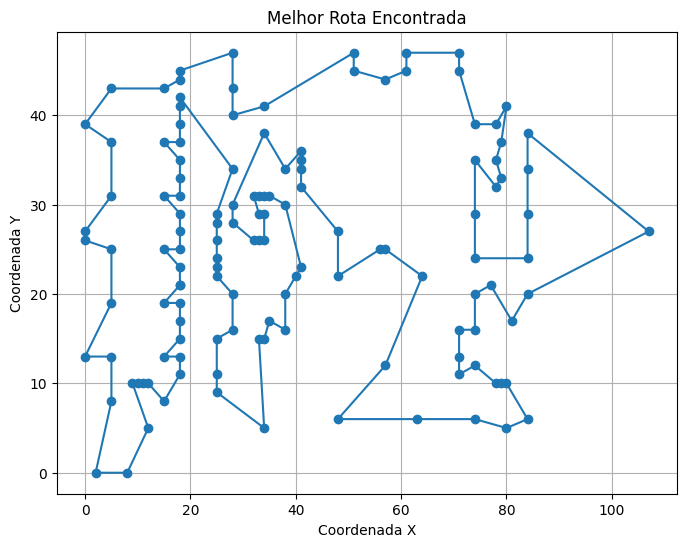

Iteração 1:
Melhor solução encontrada pelo LKH com algoritmo genético: [9, 2, 1, 7, 8, 21, 22, 38, 37, 36, 35, 34, 33, 20, 32, 31, 19, 18, 16, 15, 14, 13, 5, 6, 0, 11, 4, 12, 17, 24, 25, 26, 27, 28, 29, 30, 49, 50, 51, 55, 48, 47, 46, 54, 53, 45, 44, 52, 73, 63, 67, 74, 76, 77, 80, 81, 68, 64, 61, 65, 69, 78, 75, 70, 66, 62, 56, 57, 71, 79, 82, 83, 84, 85, 89, 94, 95, 110, 109, 108, 107, 112, 106, 105, 100, 101, 98, 93, 91, 87, 86, 88, 92, 97, 99, 104, 113, 117, 120, 111, 122, 129, 123, 124, 125, 130, 126, 114, 118, 127, 128, 121, 119, 115, 116, 102, 103, 96, 90, 72, 60, 59, 58, 39, 40, 41, 42, 43, 23, 10, 3]
Melhor fitness encontrado pelo LKH com algoritmo genético: 649.3501028124821

Resultados de fitness por geração:
Geração 1:
[649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028124821, 649.3501028

In [30]:
import math

# Função para calcular a distância entre dois pontos (coordenadas)
def calcular_distancia(ponto1, ponto2):
    x1, y1 = ponto1
    x2, y2 = ponto2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Função para calcular a aptidão (fitness) de uma solução para o TSP
def calcular_fitness(solucao, coordenadas):
    distancia_total = 0.0

    for i in range(len(solucao) - 1):
        cidade_atual = solucao[i]
        proxima_cidade = solucao[i + 1]
        distancia_total += calcular_distancia(coordenadas[cidade_atual], coordenadas[proxima_cidade])

    distancia_total += calcular_distancia(coordenadas[solucao[-1]], coordenadas[solucao[0]])
    
    return distancia_total  # Retorna a distância total como fitness

# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

# Suponha que você tenha uma lista de índices que representam a ordem das cidades a serem visitadas
solucao = list(range(len(coordenadas)))  # Exemplo de ordem de visita de cidades

# Chame a função para calcular a aptidão da solução
fitness = calcular_fitness(solucao, coordenadas)

# Imprima o resultado na tela
print(f'Aptidão da solução: {fitness}')

import random

# Função para gerar uma solução inicial aleatória
def gerar_solucao_inicial(coordenadas):
    num_cidades = len(coordenadas)
    solucao = list(range(num_cidades))
    random.shuffle(solucao)
    return solucao

# Função para aplicar a heurística de movimento 2-opt
def aplicar_2opt(solucao, coordenadas):
    melhorou = True
    while melhorou:
        melhorou = False
        for i in range(len(solucao) - 1):
            for j in range(i + 1, len(solucao)):
                nova_solucao = solucao[:i] + solucao[i:j][::-1] + solucao[j:]
                nova_distancia = calcular_fitness(nova_solucao, coordenadas)
                if nova_distancia < calcular_fitness(solucao, coordenadas):
                    solucao = nova_solucao
                    melhorou = True
    return solucao

# Função principal do LKH
def lkh(coordenadas, iteracoes):
    melhor_solucao = None
    melhor_fitness = float('inf')

    for _ in range(iteracoes):
        solucao_atual = gerar_solucao_inicial(coordenadas)
        solucao_atual = aplicar_2opt(solucao_atual, coordenadas)
        fitness_atual = calcular_fitness(solucao_atual, coordenadas)

        if fitness_atual < melhor_fitness:
            melhor_solucao = solucao_atual
            melhor_fitness = fitness_atual

    return melhor_solucao, melhor_fitness

# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

# Defina o número de iterações para o LKH
num_iteracoes = 10

# Execute o LKH
melhor_solucao, melhor_fitness = lkh(coordenadas, num_iteracoes)

# Imprima a melhor solução e seu fitness
print(f'Melhor solução: {melhor_solucao}')
print(f'Melhor fitness: {melhor_fitness}')

import matplotlib.pyplot as plt

# Função para plotar a melhor rota
def plotar_melhor_rota(coordenadas, melhor_solucao):
    x = [coordenadas[i][0] for i in melhor_solucao]
    y = [coordenadas[i][1] for i in melhor_solucao]
    x.append(x[0])  # Para criar um loop na rota
    y.append(y[0])

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title('Melhor Rota Encontrada')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)
    plt.show()

# Chame a função para plotar a melhor rota com as coordenadas e a melhor solução encontrada
plotar_melhor_rota(coordenadas, melhor_solucao)

import random

# Função para realizar o crossover de dois pais
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto_corte] + [cidade for cidade in pai2 if cidade not in pai1[:ponto_corte]]
    filho2 = pai2[:ponto_corte] + [cidade for cidade in pai1 if cidade not in pai2[:ponto_corte]]
    return filho1, filho2

# Função para realizar a mutação de um cromossomo
def mutacao(cromossomo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        # Escolhe aleatoriamente duas posições para trocar
        pos1, pos2 = random.sample(range(len(cromossomo)), 2)
        cromossomo[pos1], cromossomo[pos2] = cromossomo[pos2], cromossomo[pos1]

# Função principal do LKH com algoritmo genético
def lkh_com_algoritmo_genetico(coordenadas, iteracoes, tamanho_populacao, taxa_mutacao, numero_geracoes):
    melhor_solucao = None
    melhor_fitness = float('inf')

    resultados_fitness_por_geracao = []

    for _ in range(iteracoes):
        solucao_atual = gerar_solucao_inicial(coordenadas)
        solucao_atual = aplicar_2opt(solucao_atual, coordenadas)
        fitness_atual = calcular_fitness(solucao_atual, coordenadas)

        if fitness_atual < melhor_fitness:
            melhor_solucao = solucao_atual
            melhor_fitness = fitness_atual

        # Crie uma população inicial com base na melhor solução atual
        populacao = [solucao_atual] * tamanho_populacao

        resultados_fitness_por_geracao_iteracao = []

        for geracao in range(numero_geracoes):
            # Avalie a aptidão de cada indivíduo na população
            aptidoes = [calcular_fitness(solucao, coordenadas) for solucao in populacao]

            resultados_fitness_por_geracao_iteracao.append(aptidoes)

            # Seleciona os dois melhores indivíduos como pais
            indice_pai1 = aptidoes.index(min(aptidoes))
            aptidoes.pop(indice_pai1)
            indice_pai2 = aptidoes.index(min(aptidoes))

            # Realiza o crossover dos pais para criar dois filhos
            filho1, filho2 = crossover(populacao[indice_pai1], populacao[indice_pai2])

            # Realiza a mutação nos filhos
            mutacao(filho1, taxa_mutacao)
            mutacao(filho2, taxa_mutacao)

            # Substitui os dois piores indivíduos pelos filhos na população
            aptidoes.pop(aptidoes.index(max(aptidoes)))
            aptidoes.pop(aptidoes.index(max(aptidoes)))
            populacao.append(filho1)
            populacao.append(filho2)

        resultados_fitness_por_geracao.append(resultados_fitness_por_geracao_iteracao)

        # Atualize a melhor solução se uma solução melhor for encontrada
        melhor_populacao = min(populacao, key=lambda solucao: calcular_fitness(solucao, coordenadas))
        melhor_fitness_populacao = calcular_fitness(melhor_populacao, coordenadas)

        if melhor_fitness_populacao < melhor_fitness:
            melhor_solucao = melhor_populacao
            melhor_fitness = melhor_fitness_populacao

    return melhor_solucao, melhor_fitness, resultados_fitness_por_geracao

# Parâmetros do algoritmo genético
tamanho_populacao_genetico = 100
taxa_mutacao_genetico = 0.7
numero_geracoes_genetico = 100

# Número de iterações desejadas
num_iteracoes = 3

# Execute o LKH com algoritmo genético
for iteracao in range(num_iteracoes):
    melhor_solucao_genetico, melhor_fitness_genetico, resultados_fitness_por_geracao = lkh_com_algoritmo_genetico(coordenadas, 1, tamanho_populacao_genetico, taxa_mutacao_genetico, numero_geracoes_genetico)

    # Imprima a melhor solução e seu fitness para esta iteração
    print(f'Iteração {iteracao + 1}:')
    print(f'Melhor solução encontrada pelo LKH com algoritmo genético: {melhor_solucao_genetico}')
    print(f'Melhor fitness encontrado pelo LKH com algoritmo genético: {melhor_fitness_genetico}')
    print()

    # Imprimir todos os resultados de fitness por geração nesta iteração
    print("Resultados de fitness por geração:")
    for geracao, resultados_fitness in enumerate(resultados_fitness_por_geracao, start=1):
        print(f'Geração {geracao}:')
        for fitness in resultados_fitness:
            print(f'{fitness}', end=' ')
        print("\n")


Teste:

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Função para calcular a distância entre dois pontos (coordenadas)
def calcular_distancia(ponto1, ponto2):
    x1, y1 = ponto1
    x2, y2 = ponto2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Função para calcular a aptidão (fitness) de uma solução para o TSP
def calcular_fitness(solucao, coordenadas):
    distancia_total = 0.0
    for i in range(len(solucao) - 1):
        cidade_atual = solucao[i]
        proxima_cidade = solucao[i + 1]
        distancia_total += calcular_distancia(coordenadas[cidade_atual], coordenadas[proxima_cidade])
    distancia_total += calcular_distancia(coordenadas[solucao[-1]], coordenadas[solucao[0]])
    return distancia_total  # Retorna a distância total como fitness

# Função para gerar uma solução inicial aleatória
def gerar_solucao_inicial(coordenadas):
    num_cidades = len(coordenadas)
    solucao = list(range(num_cidades))
    random.shuffle(solucao)
    return solucao

# Função para aplicar a heurística de movimento 2-opt
def aplicar_2opt(solucao, coordenadas):
    melhorou = True
    while melhorou:
        melhorou = False
        for i in range(len(solucao) - 1):
            for j in range(i + 1, len(solucao)):
                nova_solucao = solucao[:i] + solucao[i:j][::-1] + solucao[j:]
                nova_distancia = calcular_fitness(nova_solucao, coordenadas)
                if nova_distancia < calcular_fitness(solucao, coordenadas):
                    solucao = nova_solucao
                    melhorou = True
    return solucao

# Função principal do LKH
def lkh(coordenadas, iteracoes):
    melhor_solucao = None
    melhor_fitness = float('inf')
    resultados_fitness_por_geracao = []

    for _ in range(iteracoes):
        solucao_atual = gerar_solucao_inicial(coordenadas)
        solucao_atual = aplicar_2opt(solucao_atual, coordenadas)
        fitness_atual = calcular_fitness(solucao_atual, coordenadas)

        if fitness_atual < melhor_fitness:
            melhor_solucao = solucao_atual
            melhor_fitness = fitness_atual

        resultados_fitness_por_geracao_iteracao = []

        for geracao in range(100):
            # Execute o LKH por 100 gerações em vez de 10
            for i in range(100):
                solucao_atual = gerar_solucao_inicial(coordenadas)
                solucao_atual = aplicar_2opt(solucao_atual, coordenadas)
                fitness_atual = calcular_fitness(solucao_atual, coordenadas)

                if fitness_atual < melhor_fitness:
                    melhor_solucao = solucao_atual
                    melhor_fitness = fitness_atual

            resultados_fitness_por_geracao_iteracao.append(melhor_fitness)

        resultados_fitness_por_geracao.append(resultados_fitness_por_geracao_iteracao)

    return melhor_solucao, melhor_fitness, resultados_fitness_por_geracao

# Nome do arquivo TSP que você deseja ler
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo TSP
coordenadas = ler_coordenadas_tsp(nome_arquivo)

# Parâmetros do algoritmo LKH
num_iteracoes = 3

# Execute o LKH
for iteracao in range(num_iteracoes):
    melhor_solucao, melhor_fitness, resultados_fitness_por_geracao = lkh(coordenadas, 1)

    # Imprima a melhor solução e seu fitness para esta iteração
    print(f'Iteração {iteracao + 1}:')
    print(f'Melhor solução encontrada pelo LKH: {melhor_solucao}')
    print(f'Melhor fitness encontrado pelo LKH: {melhor_fitness}')
    print()

# Plotar um gráfico comparativo das melhores distâncias em cada geração
plt.figure(figsize=(8, 6))
for i, resultados in enumerate(resultados_fitness_por_geracao):
    plt.plot(resultados, label=f'Iteração {i + 1}')
plt.title('Evolução da Melhor Distância (LKH)')
plt.xlabel('Geração')
plt.ylabel('Melhor Distância (km)')
plt.legend()
plt.grid(True)
plt.show()
